# Practice Lab Lecture 11 -
## Decision Trees
In this lab we will use decision trees classification for the IRIS dataset. 
Based on Chapter 6 from Aurelien Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow.\
Original code examples from book in github [here](https://github.com/ageron/handson-ml2) \
Scikit-learn documentation with examples [here](https://scikit-learn.org/stable/modules/tree.html#tree)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice11_Trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sklearn.set_config(print_changed_only=False)

In [2]:
sklearn.__version__

'1.0.1'

### Exercise 1: 
Let us take the Iris data set as before. Let us apply the classification using Gini and Entropy and compare results using Depth = 2.\
Then compare with Depth = 3 (use either criterion). Compare these last two and explain which works better for this case and why.


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf1 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='gini')
tree_clf3 = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='gini')
print(X.shape,y.shape)
print(y)
print(tree_clf1.fit(X, y))
print(tree_clf2.fit(X, y))
print(tree_clf3.fit(X, y))

(150, 2) (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       rando

To plot a decision tree we can use a package called "Graphviz" that takes descriptions of graphs in a simple text language,\
and make diagrams in useful formats, such as images and SVG for web pages; \
Scikit-learn provides a function to export trees to the text format used in Graphviz

In [4]:
#!pip install graphviz

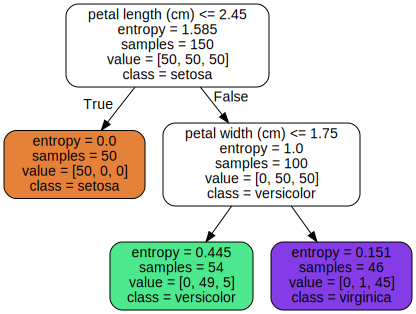

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf1,
        out_file="iris_treeEntropy.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_treeEntropy.dot")

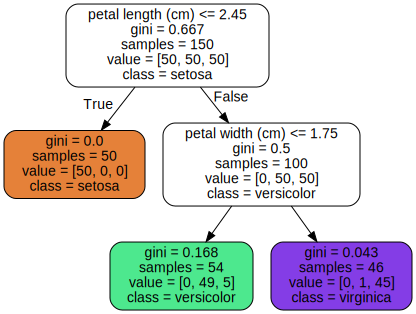

In [8]:
export_graphviz(
        tree_clf2,
        out_file="iris_treeGini.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_treeGini.dot")

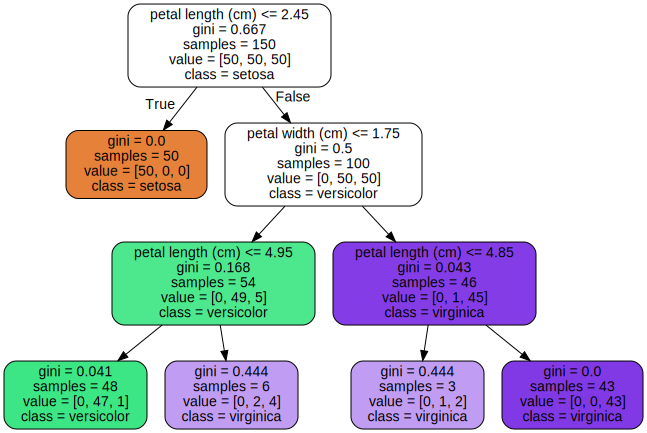

In [9]:
export_graphviz(
        tree_clf3,
        out_file="iris_treeGinib.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_treeGinib.dot")

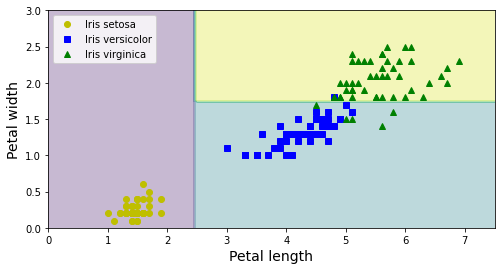

In [10]:
# To plot decision boundaries we can use the same idea as in previous Lectures.
# Create a grid with meshgrid containing the two features and the predict their output for each.
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    plt.axis(axes)
    plt.legend()


plt.figure(figsize=(8, 4))
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_decision_boundary(tree_clf2, X, y)


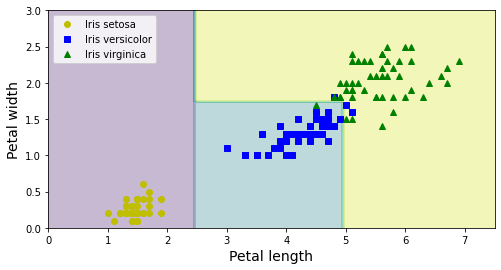

In [11]:
plt.figure(figsize=(8, 4))
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_decision_boundary(tree_clf3, X, y)

### Exercise 2
Use the make_moons class from sklearn with 100 samples and create two trees, one with no restrictions and the other with different restrictions.\
Which of all restrictions seem more effective? 

In [12]:
# Example without restrictions
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=500, noise=0.25, random_state=53)
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf1.fit(Xm, ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [13]:
def plot_decision_boundary_moons(clf, X, y, axes=[-1.5, 2.4, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="class 1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="class 2")
    plt.axis(axes)
    plt.legend()

Text(0.5, 1.0, "Moon's dataset: Tree without restrictions")

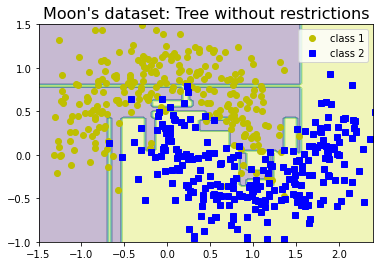

In [14]:
plot_decision_boundary_moons(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5])
plt.title("Moon's dataset: Tree without restrictions", fontsize=16)

Now, try different parameters to restrict the tree and plot again. For example, in the book min_samples_leaf=4 is used. You can try other parameters and see how the tree changes. 

In [15]:
deep_tree_clf2 = DecisionTreeClassifier(min_impurity_decrease=0.004, random_state=42)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.004, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

Text(0.5, 1.0, 'min_impurity_decrease.0.004')

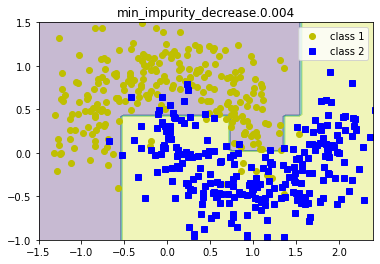

In [17]:

plot_decision_boundary_moons(deep_tree_clf2, Xm, ym)
plt.title("min_impurity_decrease.{}".format(deep_tree_clf2.min_impurity_decrease))

### Exercise 3: Regression
Define a polynomial of third degree, add noise, and try to fit a tree of any depth you wish. Then apply regularization.

In [18]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + 10 * (X-0.4) **3
y = y + np.random.randn(m, 1) / 10

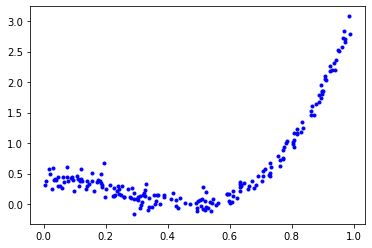

In [19]:
plt.plot(X,y,'b.')

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42, min_samples_leaf=4)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

In [32]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 3], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.legend()

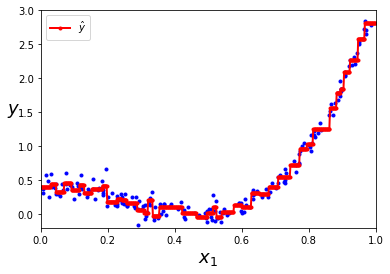

In [33]:
plot_regression_predictions(tree_reg, X, y)

### Exercise 4: Regression (from sklearn-documentation)
Fit the function $ y=sin(x) + sin(6*x) + noise $ with a DT of depth 4 and another of depth 6.

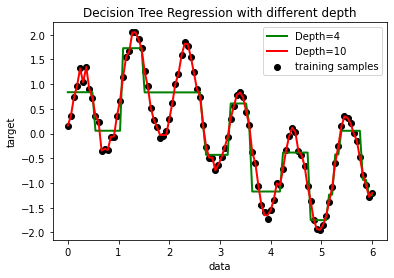

In [37]:
# Author: Noel Dawe <noel.dawe@gmail.com>
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=10)
#regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="Depth=4", linewidth=2)
plt.plot(X, y_2, c="r", label="Depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression with different depth")
plt.legend()
plt.show()


## SKL Example: Overfitting with multi-output Decision Tree Regression (from documentation)
An example to illustrate multi-output regression with decision tree.\
The decision tree is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. \
As a result, it learns local linear regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, \
the decision tree learns too fine details of the training data obtained from the noise, i.e. it overfits.

(100, 1) (100, 2)


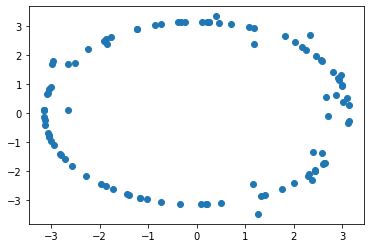

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))
print(X.shape,y.shape)
plt.plot(y[:,0],y[:,1],'o')



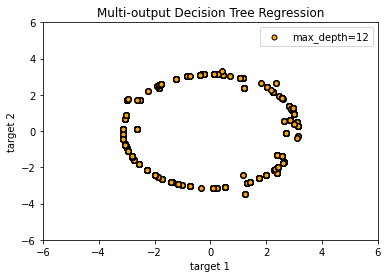

In [46]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=12)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
#plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
#plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, edgecolor="black", label="max_depth=2")
#plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,edgecolor="black", label="max_depth=12")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()